In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv("NHoodNameCentroids.csv")

In [3]:
data.head()

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,POINT (-73.90564259591689 40.895437426903875),4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,POINT (-73.91258546108577 40.89083449389134),5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


In [4]:
data['latitude'] = '0'
data['longitude'] = '0'
data.dtypes

the_geom     object
OBJECTID      int64
Name         object
Stacked       int64
AnnoLine1    object
AnnoLine2    object
AnnoLine3    object
AnnoAngle     int64
Borough      object
latitude     object
longitude    object
dtype: object

In [5]:
for index, row in data.iterrows():
    lat_long = re.search('POINT \((.+?)\)',  row['the_geom'])
    if lat_long:
        data['latitude'][index] = lat_long.group(1).split(' ')[1]
        data['longitude'][index] = lat_long.group(1).split(' ')[0]
data.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough,latitude,longitude
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx,40.89470517661004,-73.8472005205491
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx,40.87429419303015,-73.82993910812405
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx,40.88755567735082,-73.82780644716419
3,POINT (-73.90564259591689 40.895437426903875),4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx,40.895437426903875,-73.90564259591689
4,POINT (-73.91258546108577 40.89083449389134),5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx,40.89083449389134,-73.91258546108577


In [6]:
manhattan_data = data[data['Borough'] == 'Manhattan'].reset_index(drop=True)
drop_columns = ['the_geom', 'OBJECTID', 'Stacked', 'AnnoLine1', 'AnnoLine2', 'AnnoLine3', 'AnnoAngle']
for col in drop_columns:
    del manhattan_data[col]

In [7]:
manhattan_data.head()

,Name,Borough,latitude,longitude
0,Marble Hill,Manhattan,40.87655077879968,-73.91065965862988
1,Chinatown,Manhattan,40.715618422314364,-73.99427936255985
2,Washington Heights,Manhattan,40.85190252555309,-73.93690027985242
3,Inwood,Manhattan,40.86768396449919,-73.92121042203905
4,Hamilton Heights,Manhattan,40.82360428481197,-73.94968791883373


In [8]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from geopy.geocoders import Nominatim

In [8]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [9]:
CLIENT_ID = 'C1UYVLF4RL5AWWT22ISOZIFGKGELWO3MKB345KNQVCAPKYX3'
CLIENT_SECRET = 'HPP5M3BSQE3DGNEPI4HHIK5LHNWAV0FIW23ZMDQWBTBM5M0H'
LIMIT = 10000
RADIUS = 500
VERSION = '20180605'

In [10]:
import requests

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Name'],
                                   latitudes=manhattan_data['latitude'],
                                   longitudes=manhattan_data['longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron


In [13]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.87655077879968,-73.91065965862988,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.87655077879968,-73.91065965862988,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.87655077879968,-73.91065965862988,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.87655077879968,-73.91065965862988,Dunkin',40.877136,-73.906666,Donut Shop


In [14]:
# Examiing the venue category 
venue_categories = list(set(manhattan_venues['Venue Category']))
print(venue_categories)

['Lebanese Restaurant', 'Tailor Shop', 'Bridal Shop', 'Butcher', 'Historic Site', 'Bakery', 'Himalayan Restaurant', 'Argentinian Restaurant', 'Market', 'Smoke Shop', 'Sushi Restaurant', 'Lounge', 'Public Art', 'Veterinarian', 'Bridge', 'Daycare', 'Jazz Club', 'Massage Studio', 'Afghan Restaurant', 'Beer Garden', 'Office', 'Pub', 'Tennis Court', 'Szechuan Restaurant', 'Creperie', 'Memorial Site', 'High School', 'Mexican Restaurant', 'Spa', 'Spiritual Center', 'Comedy Club', 'Harbor / Marina', 'Grocery Store', 'Hotel', 'Adult Boutique', 'Performing Arts Venue', 'Turkish Restaurant', 'Ethiopian Restaurant', 'Soup Place', 'Fountain', 'Cultural Center', 'Theme Park Ride / Attraction', 'Indie Theater', 'Hobby Shop', 'Donut Shop', 'Noodle House', 'Organic Grocery', 'Bike Trail', 'Golf Course', 'Circus', 'Gym Pool', 'Japanese Restaurant', 'Brazilian Restaurant', "Men's Store", 'Pet Café', 'Kids Store', 'Leather Goods Store', 'Smoothie Shop', 'Antique Shop', 'Shipping Store', 'Salad Place', 'Bi

In [15]:
sample_categories = ['school', 'college', 'university', 'tea', 'coffee', 'office', 'center', 'cafeteria', 'café', 'center', 'academic', 'services']
filtered_categories = []
for venue in venue_categories:
    venue_lower = venue.lower()
    for sample_venue in sample_categories:
        if sample_venue in venue_lower:
            filtered_categories.append(venue)
print(filtered_categories)

['Office', 'High School', 'Spiritual Center', 'Spiritual Center', 'Cultural Center', 'Cultural Center', 'Pet Café', 'College Cafeteria', 'College Cafeteria', 'Paper / Office Supplies Store', 'Cafeteria', 'School', 'College Academic Building', 'College Academic Building', 'Cooking School', 'Medical Center', 'Medical Center', 'Gym / Fitness Center', 'Gym / Fitness Center', 'College Arts Building', 'Weight Loss Center', 'Weight Loss Center', 'Coffee Shop', 'College Theater', 'Tourist Information Center', 'Tourist Information Center', 'Steakhouse', 'Music School', 'Café', 'College Bookstore', 'Bubble Tea Shop', 'Garden Center', 'Garden Center', 'Recreation Center', 'Recreation Center', 'Community Center', 'Community Center', "Doctor's Office", 'Tea Room']


In [16]:
#Filerring out the relevant categories
relevant_categories = ['Pet Café', 'College Theater', 'Gym / Fitness Center', 'Gym / Fitness Center', 
                       'Cooking School', 'Tourist Information Center', 'Tourist Information Center', 'Music School', 
                       'Cultural Center', 'Cultural Center', 'Community Center', 'Community Center', 
                       'Weight Loss Center', 'Weight Loss Center', 'Café', 'Tea Room', 'School', 
                       'College Academic Building', 'College Academic Building', 'Cafeteria', 'Garden Center', 
                       'Garden Center', 'Bubble Tea Shop', 'Coffee Shop', 'High School', 'College Bookstore', 
                       'Recreation Center', 'Recreation Center', 'Paper / Office Supplies Store', 
                       "Doctor's Office", 'College Arts Building', 'Office', 'College Cafeteria', 
                       'College Cafeteria', 'Medical Center', 
                       'Medical Center', 'Spiritual Center', 'Spiritual Center' ]

In [17]:
manhattan_venues = manhattan_venues[manhattan_venues['Venue Category'].isin(relevant_categories)]

In [18]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.877531,-73.905582,Coffee Shop
10,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.873755,-73.908613,Coffee Shop
45,Chinatown,40.715618422314364,-73.99427936255985,Teado,40.717184,-73.994883,Bubble Tea Shop
46,Chinatown,40.715618422314364,-73.99427936255985,Yaya Tea Garden,40.716177,-73.994902,Tea Room
52,Chinatown,40.715618422314364,-73.99427936255985,The Sill,40.716245,-73.992027,Garden Center


In [19]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Bubble Tea Shop,Cafeteria,Café,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,...,Music School,Office,Paper / Office Supplies Store,Pet Café,Recreation Center,School,Spiritual Center,Tea Room,Tourist Information Center,Weight Loss Center
3,Marble Hill,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Marble Hill,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Chinatown,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
52,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped

,Neighborhood,Bubble Tea Shop,Cafeteria,Café,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,...,Music School,Office,Paper / Office Supplies Store,Pet Café,Recreation Center,School,Spiritual Center,Tea Room,Tourist Information Center,Weight Loss Center
0,Battery Park City,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Carnegie Hill,0,0,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Harlem,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,1,6,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Chinatown,2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,Civic Center,1,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Clinton,0,0,1,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,East Harlem,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,East Village,0,0,0,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Financial District,0,0,1,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
manhattan_grouped['Customers'] = 0
manhattan_grouped['Competitors'] = 0
Customers =[ 'College Theater', 'Gym / Fitness Center', 'Gym / Fitness Center', 
                       'Cooking School', 'Tourist Information Center', 'Tourist Information Center', 'Music School', 
                       'Cultural Center', 'Cultural Center', 'Community Center', 'Community Center', 
                       'Weight Loss Center', 'Weight Loss Center', 'School', 
                       'College Academic Building', 'College Academic Building','Garden Center', 
                       'Garden Center','High School', 'College Bookstore', 
                       'Recreation Center', 'Recreation Center', 'Paper / Office Supplies Store', 
                       "Doctor's Office", 'College Arts Building', 'Office', 'Medical Center', 
                       'Medical Center', 'Spiritual Center', 'Spiritual Center' ]
for customer in Customers:
    manhattan_grouped['Customers'] = manhattan_grouped['Customers'] + manhattan_grouped[customer]
Competitors = ['Café', 'Tea Room', 'Cafeteria', 'Bubble Tea Shop', 'Coffee Shop', 'College Cafeteria', 
                       'College Cafeteria']
for competitor in Competitors:
    manhattan_grouped['Competitors'] = manhattan_grouped['Competitors'] + manhattan_grouped[competitor]

In [57]:
manhattan_grouped

,Neighborhood,Bubble Tea Shop,Cafeteria,Café,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,...,Paper / Office Supplies Store,Pet Café,Recreation Center,School,Spiritual Center,Tea Room,Tourist Information Center,Weight Loss Center,Customers,Competitors
0,Battery Park City,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,8
1,Carnegie Hill,0,0,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,10
2,Central Harlem,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,Chelsea,0,0,1,6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,7
4,Chinatown,2,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,3,4
5,Civic Center,1,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,7
6,Clinton,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,3
7,East Harlem,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,East Village,0,0,0,3,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,3
9,Financial District,0,0,1,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,10


In [23]:
import matplotlib.pyplot as plt;

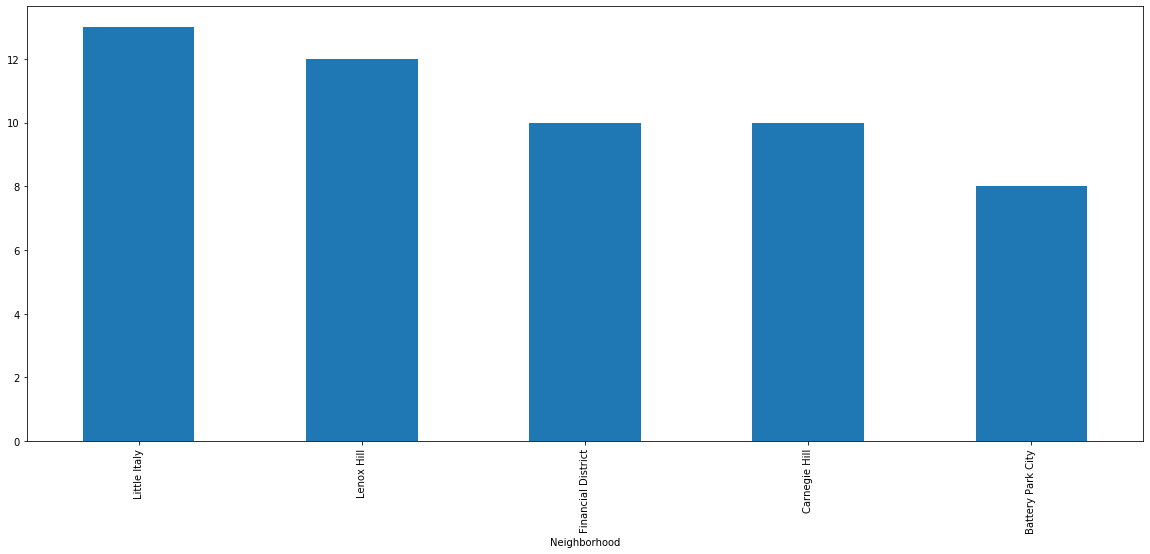

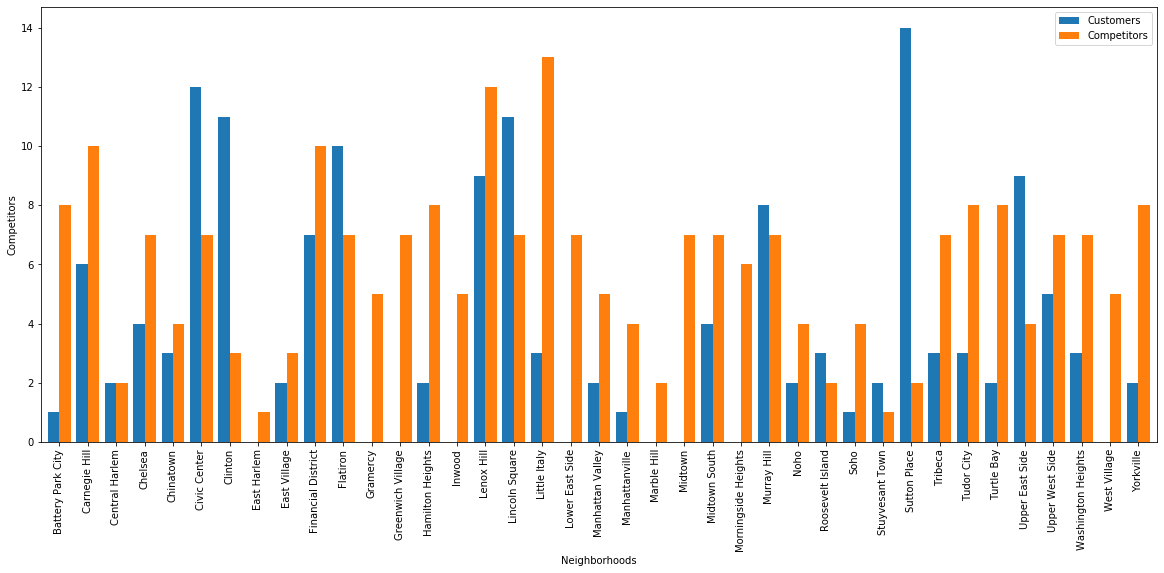

In [24]:
df = manhattan_grouped[['Neighborhood', 'Customers', 'Competitors']].copy()
df.set_index("Neighborhood",drop=True,inplace=True)
df.sort_values(by=['Competitors'], ascending=False)[:5]['Competitors'].plot(kind='bar', figsize=(20, 8))
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, edgecolor="none")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Competitors")
plt.show()

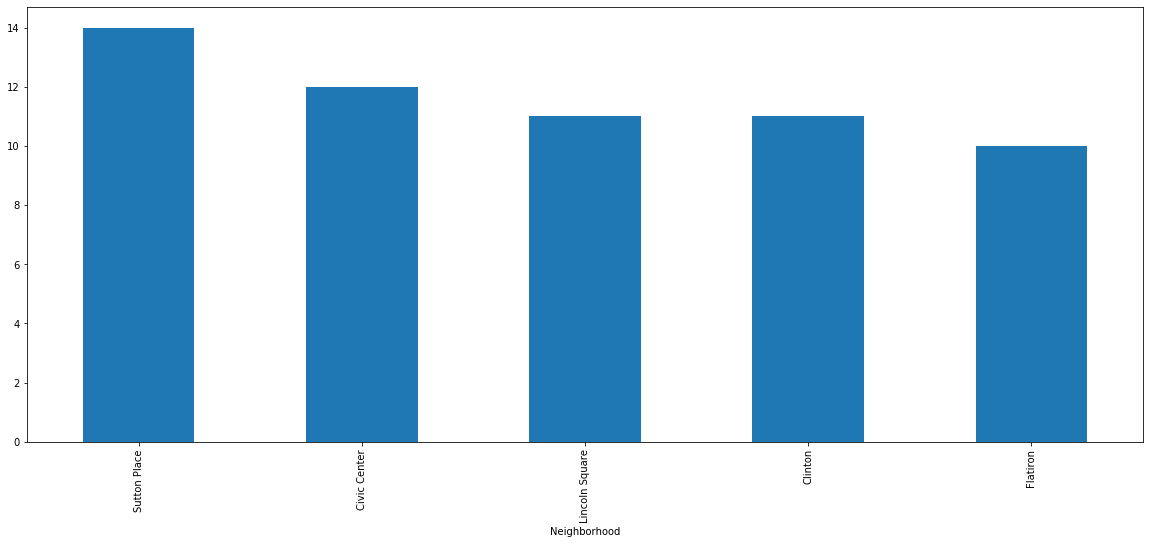

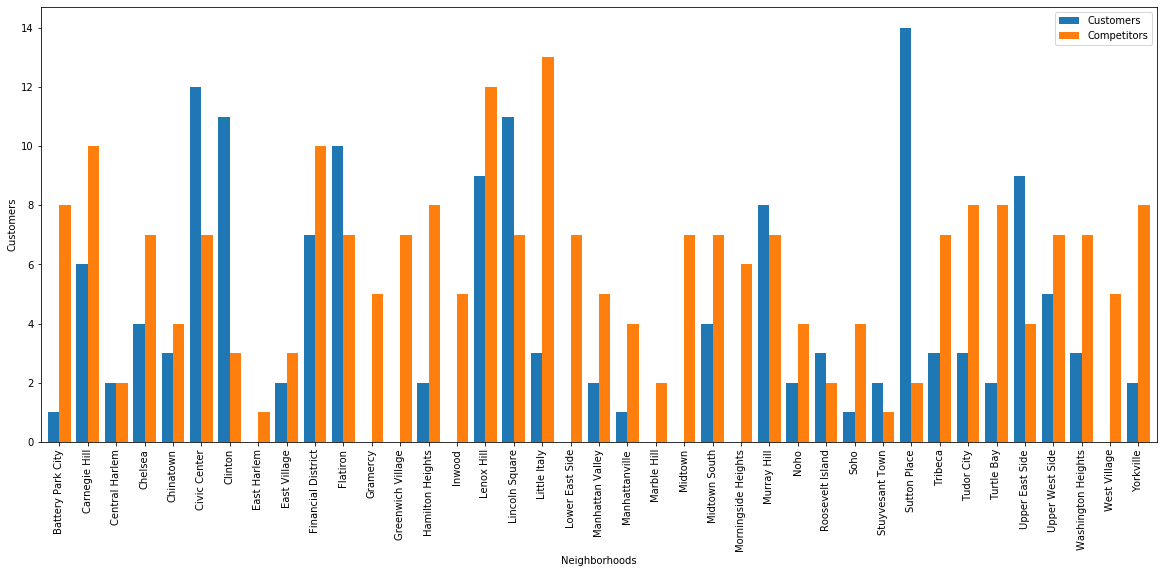

In [25]:
df.sort_values(by=['Customers'], ascending=False)[:5]['Customers'].plot(kind='bar', figsize=(20, 8))
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, edgecolor="none")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Customers")
plt.show()

In [29]:
pip install geopandas

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
     |████████████████████████████████| 13.4MB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 14.3MB/s eta 0:00:01
     |████████████████████████████████| 17.9MB 13.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e472702488857914bdd50f73021efea15b4cad9aca8ecef/click_plugins-1.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/ab/85d8da5c9a45e072301beb37ad7f833cd344e04c817d97e0cc75681d248f/munch-2.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/37/45185cb5abbc30d7257104c434fe0b07e5a195a6847506c074527aa599ec/Click-7.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium
import geopandas

In [38]:
df_customers = manhattan_venues[manhattan_venues['Venue Category'].isin(Customers)]
df_competitors = manhattan_venues[manhattan_venues['Venue Category'].isin(Competitors)]

In [47]:
customer_locations = df_customers[['Venue Latitude', 'Venue Longitude']]
customer_locations = customer_locations.values.tolist()
competitor_locations = df_competitors[['Venue Latitude', 'Venue Longitude']]
competitor_locations = competitor_locations.values.tolist()

In [55]:
from folium.plugins import MarkerCluster
map = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
for point in range(0, len(customer_locations)):
    folium.Marker(customer_locations[point]).add_to(marker_cluster)
map

In [56]:
from folium.plugins import MarkerCluster
map = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
for point in range(0, len(competitor_locations)):
    folium.Marker(competitor_locations[point]).add_to(marker_cluster)
map

In [73]:
#Creating a new data frame with Neighborhood, Customers, Competitors, Latitude, Longitude
manhattan_caffes = manhattan_grouped[['Neighborhood', 'Customers', 'Competitors']].copy()
manhattan_data.head() 
manhattan_caffe_neighborhoods = pd.merge(manhattan_caffes, manhattan_data,  how='left', left_on=['Neighborhood'], right_on = ['Name'])
manhattan_caffe_neighborhoods

,Neighborhood,Customers,Competitors,Name,Borough,latitude,longitude
0,Battery Park City,1,8,Battery Park City,Manhattan,40.71193198394569,-74.01686930508625
1,Carnegie Hill,6,10,Carnegie Hill,Manhattan,40.78268256712574,-73.95325646837121
2,Central Harlem,2,2,Central Harlem,Manhattan,40.81597606742418,-73.94321112603912
3,Chelsea,4,7,Chelsea,Manhattan,40.74403470674802,-74.0031163347282
4,Chinatown,3,4,Chinatown,Manhattan,40.715618422314364,-73.99427936255985
5,Civic Center,12,7,Civic Center,Manhattan,40.715228920462856,-74.00541529873362
6,Clinton,11,3,Clinton,Manhattan,40.758333686906404,-73.99640768221386
7,East Harlem,0,1,East Harlem,Manhattan,40.79224946663037,-73.94418223148531
8,East Village,2,3,East Village,Manhattan,40.72784677727029,-73.98222616506425
9,Financial District,7,10,Financial District,Manhattan,40.70710710727052,-74.01066544521277


In [74]:
del manhattan_caffe_neighborhoods['Name']
del manhattan_caffe_neighborhoods['Borough']
manhattan_caffe_neighborhoods = manhattan_caffe_neighborhoods[manhattan_caffe_neighborhoods.Customers != 0]

In [76]:
manhattan_caffe_neighborhoods.reset_index(drop=True)

,Neighborhood,Customers,Competitors,latitude,longitude
0,Battery Park City,1,8,40.71193198394569,-74.01686930508625
1,Carnegie Hill,6,10,40.78268256712574,-73.95325646837121
2,Central Harlem,2,2,40.81597606742418,-73.94321112603912
3,Chelsea,4,7,40.74403470674802,-74.0031163347282
4,Chinatown,3,4,40.715618422314364,-73.99427936255985
5,Civic Center,12,7,40.715228920462856,-74.00541529873362
6,Clinton,11,3,40.758333686906404,-73.99640768221386
7,East Village,2,3,40.72784677727029,-73.98222616506425
8,Financial District,7,10,40.70710710727052,-74.01066544521277
9,Flatiron,10,7,40.73967304763847,-73.99094710528267


In [86]:
manhattan_caffe_neighborhoods['Customer_Competitor'] = 0
for index, row in manhattan_caffe_neighborhoods.iterrows():
    manhattan_caffe_neighborhoods['Customer_Competitor'][index] = df['Customers'][index] / df['Competitors'][index]
manhattan_caffe_neighborhoods

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.p

,Neighborhood,Customers,Competitors,latitude,longitude,Customer_Competitor
0,Battery Park City,1,8,40.71193198394569,-74.01686930508625,0
1,Carnegie Hill,6,10,40.78268256712574,-73.95325646837121,0
2,Central Harlem,2,2,40.81597606742418,-73.94321112603912,1
3,Chelsea,4,7,40.74403470674802,-74.0031163347282,0
4,Chinatown,3,4,40.715618422314364,-73.99427936255985,0
5,Civic Center,12,7,40.715228920462856,-74.00541529873362,1
6,Clinton,11,3,40.758333686906404,-73.99640768221386,3
8,East Village,2,3,40.72784677727029,-73.98222616506425,0
9,Financial District,7,10,40.70710710727052,-74.01066544521277,0
10,Flatiron,10,7,40.73967304763847,-73.99094710528267,1
